# Fashion MNIST
 

In [1]:
import pandas as pd
import numpy as np
import os 

datasets_root=r'C:\Users\97254\OneDrive\שולחן העבודה\temp'
train = pd.read_csv(os.path.join(datasets_root, 'fashion-mnist_train.csv'))
test = pd.read_csv(os.path.join(datasets_root, 'fashion-mnist_test.csv'))

In [2]:
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train = train.copy()
df_test = test.copy()

X_train= df_train.drop(['label'],axis = 1)
X_train.shape

(60000, 784)

In [5]:
Y_train = df_train['label']
Y_train.shape

(60000,)

**Normalized our data**

In [6]:
X_train = X_train.astype('float32')
#X_train /= 255.0

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state = 42)

In [8]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train)


PCA()

187


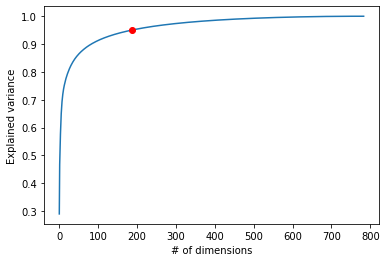

In [9]:
import matplotlib.pyplot as plt
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(d)
plt.xlabel('# of dimensions')
plt.ylabel('Explained variance')
plt.plot(cumsum);
plt.plot(d, 0.95, color='red', marker='o');

**Is shown in the graph, by choosing around 184 features, we can retain more than 94% of the variance. I ended up choosing 184 as the number of features for PCA**

I will begin with simple classic machine learning algorithms: Support Vector Machine, Logistic Regression, Decision Trees, Random Forests.

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=64, n_jobs=-1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.8748333333333334


In [11]:
from sklearn.metrics import classification_report, confusion_matrix
print ("Classification Report")
print(classification_report(y_test, y_pred))
print ("Confusion Report")
print(confusion_matrix(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1232
           1       1.00      0.96      0.98      1174
           2       0.77      0.83      0.80      1200
           3       0.87      0.92      0.89      1242
           4       0.76      0.81      0.79      1185
           5       0.95      0.96      0.96      1141
           6       0.73      0.55      0.63      1243
           7       0.94      0.94      0.94      1224
           8       0.96      0.98      0.97      1149
           9       0.95      0.95      0.95      1210

    accuracy                           0.87     12000
   macro avg       0.87      0.88      0.87     12000
weighted avg       0.87      0.87      0.87     12000

Confusion Report
[[1066    0   11   41    4    2  101    0    7    0]
 [   1 1128    5   31    1    0    8    0    0    0]
 [   8    0  996   13  117    0   57    0    9    0]
 [  21    2    7 1144   41    0   24    0  

In [12]:

X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,160.0,162.0,163.0,135.0,94.0,0.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


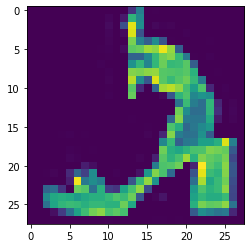

In [13]:
temp=x_test.iloc[3,:].values
temp = temp.reshape(28,28).astype('uint8')
plt.imshow(temp)


In [14]:
y_test.iloc[3]

5

In [15]:
y_pred[3]

5

In [16]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
test_data=test.drop(['label'],axis=1)
test_label=test['label']

In [18]:
test_data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
test_predict=model.predict(test_data)

In [20]:
print(accuracy_score(test_label,test_predict))

0.8796


# conclusions: 
I took the test data, performed PCA and then trained with Random Forest Classifier- with n_estimators=64.
The score I got from my train data was around 88 perc. And thus about with the cleaned test data.


# cross-validation:


In [21]:

y_train

48572    5
38696    7
13611    8
35213    5
31766    2
        ..
54343    2
38158    7
860      9
15795    4
56422    0
Name: label, Length: 48000, dtype: int64

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [10, 64, 100], 'max_features': ['auto', 'sqrt', 'log2']},
 {'bootstrap': [False], 'n_estimators': [10, 64, 100], 'max_features': ['auto', 'sqrt', 'log2']},
 ]
forest_reg = RandomForestClassifier()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5)
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [10, 64, 100]},
                         {'bootstrap': [False],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [10, 64, 100]}])

In [24]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 'auto', 'n_estimators': 100}

In [25]:
grid_search.best_score_

0.8852708333333335

## I ran the model with n_estimators=64, as we can see the best param is 100. let's try to find better n_estimator

In [26]:
param_grid = [
 {'bootstrap': [False], 'n_estimators': [100, 200, 300], 'max_features': ['auto']},
 ]
forest_reg = RandomForestClassifier()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'bootstrap': False, 'max_features': 'auto', 'n_estimators': 200}

In [27]:
grid_search.best_score_

0.8863958333333333

# conclusion:
when the model is being ran with n_estimators=200, we get the best results

In [28]:
rnd_forest=RandomForestClassifier(n_estimators=200, n_jobs=-1)
rnd_forest.fit(x_train, y_train)
pred = rnd_forest.predict(test_data)
accuracy_score(test_label, pred)

0.8826

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print ("Classification Report")
print(classification_report(test_label, pred))
print ("Confusion Report")
print(confusion_matrix(test_label, pred))

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.80      0.80      1000
           3       0.89      0.93      0.91      1000
           4       0.80      0.86      0.83      1000
           5       0.97      0.94      0.96      1000
           6       0.74      0.61      0.67      1000
           7       0.92      0.93      0.93      1000
           8       0.95      0.97      0.96      1000
           9       0.94      0.95      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Confusion Report
[[857   0  14  27   1   1  87   0  13   0]
 [  2 973   5  15   1   1   3   0   0   0]
 [  8   1 801  11 114   0  54   0  11   0]
 [ 18   7   8 933  18   0  15   0   1   0]
 [  0   0  66  31 857   0  43 

In [31]:
labels[6]

'Shirt'